# DATA PREPROCESSING

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [181]:
sleep_stats_data = pd.read_csv(r"D:\SNU Chennai\projects\sleep score\sleep_stats.csv")
sleep_score_data = pd.read_csv(r"D:\SNU Chennai\projects\sleep score\sleep_score.csv").iloc[:,:2]

i) preprocessing the sleep stats dataframe

In [182]:
sleep_stats_data.head()

,Sleep,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
1,2020-07-01 10:05PM,2020-07-02 6:23AM,456,42,37,498,94,271,91
2,2020-06-30 9:43PM,2020-07-01 6:03AM,412,88,32,500,79,208,125
3,2020-06-29 10:03PM,2020-06-30 5:57AM,412,61,26,473,91,242,79
4,2020-06-28 11:24PM,2020-06-29 6:05AM,342,59,26,401,71,196,75


In [183]:
sleep_stats_data.columns = sleep_stats_data.iloc[0]
sleep_stats_data.drop(sleep_stats_data.index[0], inplace=True)
sleep_stats_data

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
1,2020-07-01 10:05PM,2020-07-02 6:23AM,456,42,37,498,94,271,91
2,2020-06-30 9:43PM,2020-07-01 6:03AM,412,88,32,500,79,208,125
3,2020-06-29 10:03PM,2020-06-30 5:57AM,412,61,26,473,91,242,79
4,2020-06-28 11:24PM,2020-06-29 6:05AM,342,59,26,401,71,196,75
5,2020-06-27 10:42PM,2020-06-28 9:20AM,530,108,39,638,98,305,127
...,...,...,...,...,...,...,...,...,...
318,2019-07-12 11:11PM,2019-07-13 7:05AM,423,51,28,474,89,263,71
319,2019-07-11 9:58PM,2019-07-12 8:23AM,540,85,30,625,114,324,102
320,2019-07-10 9:43PM,2019-07-11 7:32AM,525,64,31,589,93,322,110
321,2019-07-09 9:12PM,2019-07-10 7:31AM,536,83,38,619,124,336,76


In [184]:
sleep_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 1 to 322
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Time            322 non-null    object
 1   End Time              322 non-null    object
 2   Minutes Asleep        322 non-null    object
 3   Minutes Awake         322 non-null    object
 4   Number of Awakenings  322 non-null    object
 5   Time in Bed           322 non-null    object
 6   Minutes REM Sleep     287 non-null    object
 7   Minutes Light Sleep   287 non-null    object
 8   Minutes Deep Sleep    287 non-null    object
dtypes: object(9)
memory usage: 22.8+ KB


In [185]:
sleep_stats_data[sleep_stats_data['Minutes REM Sleep'].isna()]

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
77,2020-04-16 2:09PM,2020-04-16 3:27PM,76,2,0,78,NaN,NaN,NaN
103,2020-03-22 1:47PM,2020-03-22 3:21PM,83,1,1,93,NaN,NaN,NaN
115,2020-03-11 4:19PM,2020-03-11 5:24PM,55,6,1,65,NaN,NaN,NaN
121,2020-03-06 3:40PM,2020-03-06 4:40PM,53,7,0,60,NaN,NaN,NaN
134,2020-02-23 2:28PM,2020-02-23 3:42PM,68,5,0,74,NaN,NaN,NaN
142,2020-02-16 10:23AM,2020-02-16 12:09PM,98,7,0,106,NaN,NaN,NaN
145,2020-02-06 11:17PM,2020-02-07 1:30AM,128,4,0,132,NaN,NaN,NaN
146,2020-02-06 4:38AM,2020-02-06 9:24AM,262,19,0,285,NaN,NaN,NaN
148,2020-02-04 11:24PM,2020-02-05 8:14AM,498,32,4,530,NaN,NaN,NaN
151,2020-02-01 11:11PM,2020-02-02 7:06AM,449,26,2,475,NaN,NaN,NaN


In [186]:
sleep_stats_data.dropna(axis=0, inplace=True)

In [187]:
cols_to_convert = sleep_stats_data.columns[2:]
sleep_stats_data[cols_to_convert] = sleep_stats_data[cols_to_convert].astype(float)

In [188]:
sleep_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 1 to 322
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Start Time            287 non-null    object 
 1   End Time              287 non-null    object 
 2   Minutes Asleep        287 non-null    float64
 3   Minutes Awake         287 non-null    float64
 4   Number of Awakenings  287 non-null    float64
 5   Time in Bed           287 non-null    float64
 6   Minutes REM Sleep     287 non-null    float64
 7   Minutes Light Sleep   287 non-null    float64
 8   Minutes Deep Sleep    287 non-null    float64
dtypes: float64(7), object(2)
memory usage: 22.4+ KB


ii) preprocessing the sleep score dataframe

In [189]:
sleep_score_data.head()

,timestamp,overall_score
0,2020-07-02T06:23:30Z,86
1,2020-07-01T06:03:30Z,77
2,2020-06-30T05:57:00Z,78
3,2020-06-29T06:05:00Z,76
4,2020-06-28T09:20:30Z,82


In [190]:
sleep_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      286 non-null    object
 1   overall_score  286 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


iii) joining both the dataframes

In [191]:
sleep_stats_data.drop(columns='Start Time', inplace=True)
sleep_stats_data['Date'] = sleep_stats_data['End Time'].apply(lambda x: x[:10])
sleep_score_data['Date'] = sleep_score_data['timestamp'].apply(lambda x: x[:10])

In [192]:
joined_data = sleep_stats_data.merge(sleep_score_data, on='Date', how='left')
joined_data.head()

,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Date,timestamp,overall_score
0,2020-07-02 6:23AM,456.0,42.0,37.0,498.0,94.0,271.0,91.0,2020-07-02,2020-07-02T06:23:30Z,86.0
1,2020-07-01 6:03AM,412.0,88.0,32.0,500.0,79.0,208.0,125.0,2020-07-01,2020-07-01T06:03:30Z,77.0
2,2020-06-30 5:57AM,412.0,61.0,26.0,473.0,91.0,242.0,79.0,2020-06-30,2020-06-30T05:57:00Z,78.0
3,2020-06-29 6:05AM,342.0,59.0,26.0,401.0,71.0,196.0,75.0,2020-06-29,2020-06-29T06:05:00Z,76.0
4,2020-06-28 9:20AM,530.0,108.0,39.0,638.0,98.0,305.0,127.0,2020-06-28,2020-06-28T09:20:30Z,82.0


In [193]:
sleep_data = joined_data.drop(columns=['End Time', 'timestamp', 'Date', 'Number of Awakenings'])
sleep_data.dropna(axis=0,inplace=True)
sleep_data.head()

,Minutes Asleep,Minutes Awake,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,overall_score
0,456.0,42.0,498.0,94.0,271.0,91.0,86.0
1,412.0,88.0,500.0,79.0,208.0,125.0,77.0
2,412.0,61.0,473.0,91.0,242.0,79.0,78.0
3,342.0,59.0,401.0,71.0,196.0,75.0,76.0
4,530.0,108.0,638.0,98.0,305.0,127.0,82.0


In [194]:
len(sleep_data)

286

# VISUALIZING THE RELATIONSHIPS BETWEEN FEATURES AND SLEEP SCORE

i) Inspecting the relationship between all the independent variables and the dependent variables 

In [195]:
def plot_relationships(df, num_cols):
    variables = df.columns
   
    dep_var = variables[-1]
    ind_var = variables[:-1]
    figs = len(dep_var)
    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    fig = 1
    plt.figure(figsize=(20,30))
   
    for i in ind_var:
        pltfignums = [str(num_rows), str(num_cols), str(fig)]
        pltfig = int(''.join(pltfignums))
        plt.subplot(pltfig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1

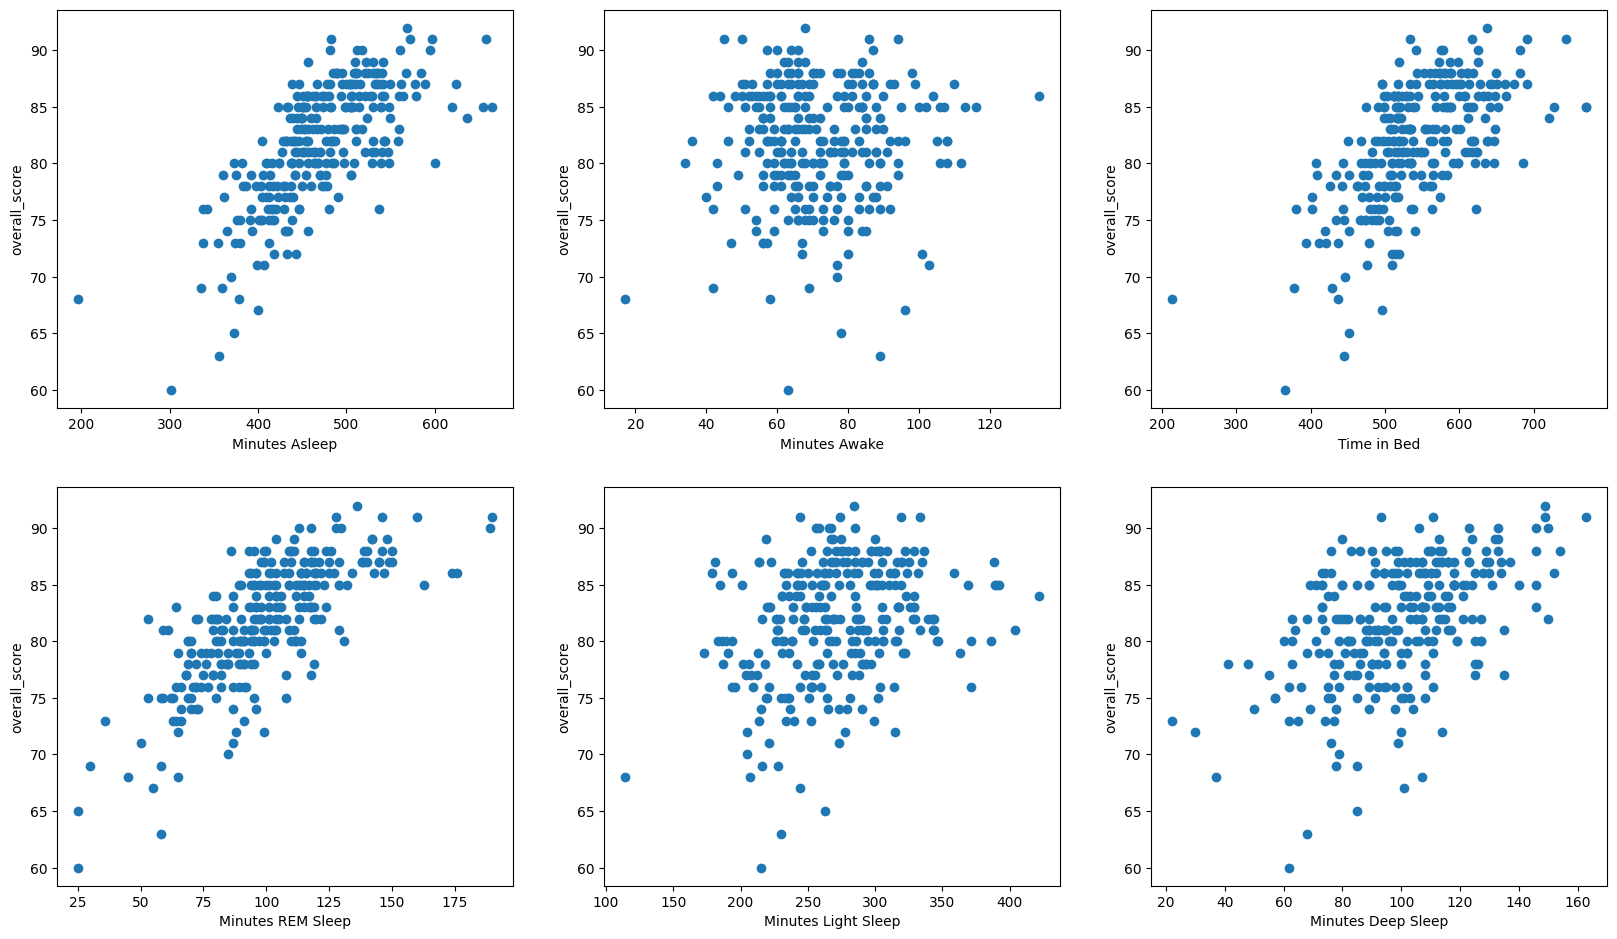

In [196]:
plot_relationships(sleep_data, 3)

ii) Inspecting the correlations

<Axes: >

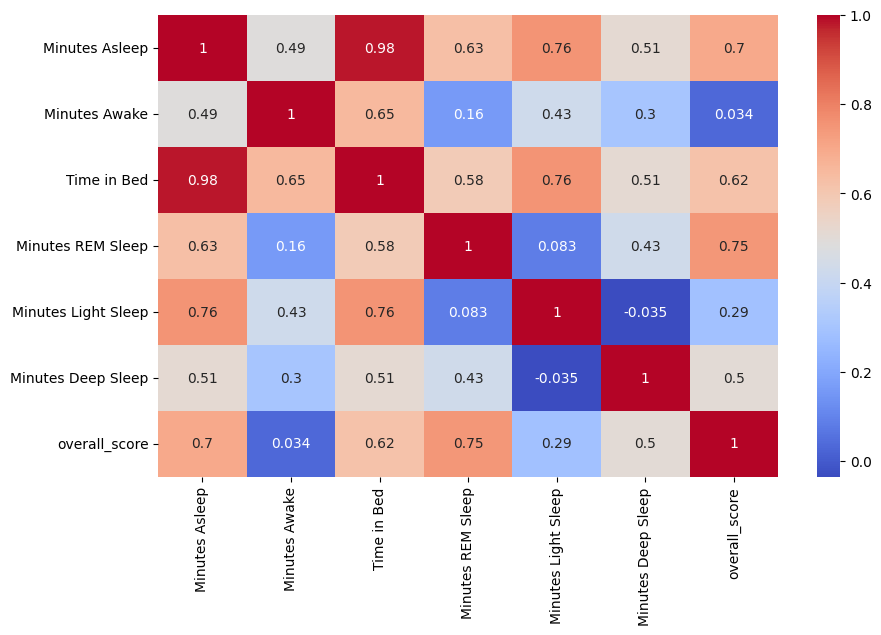

In [197]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(sleep_data.corr(), annot=True, cmap='coolwarm', fmt='.2g')

iii) Inspecting the sleep score distribution

In [198]:
spread = int(max(sleep_data.overall_score) - min(sleep_data.overall_score))
spread

32

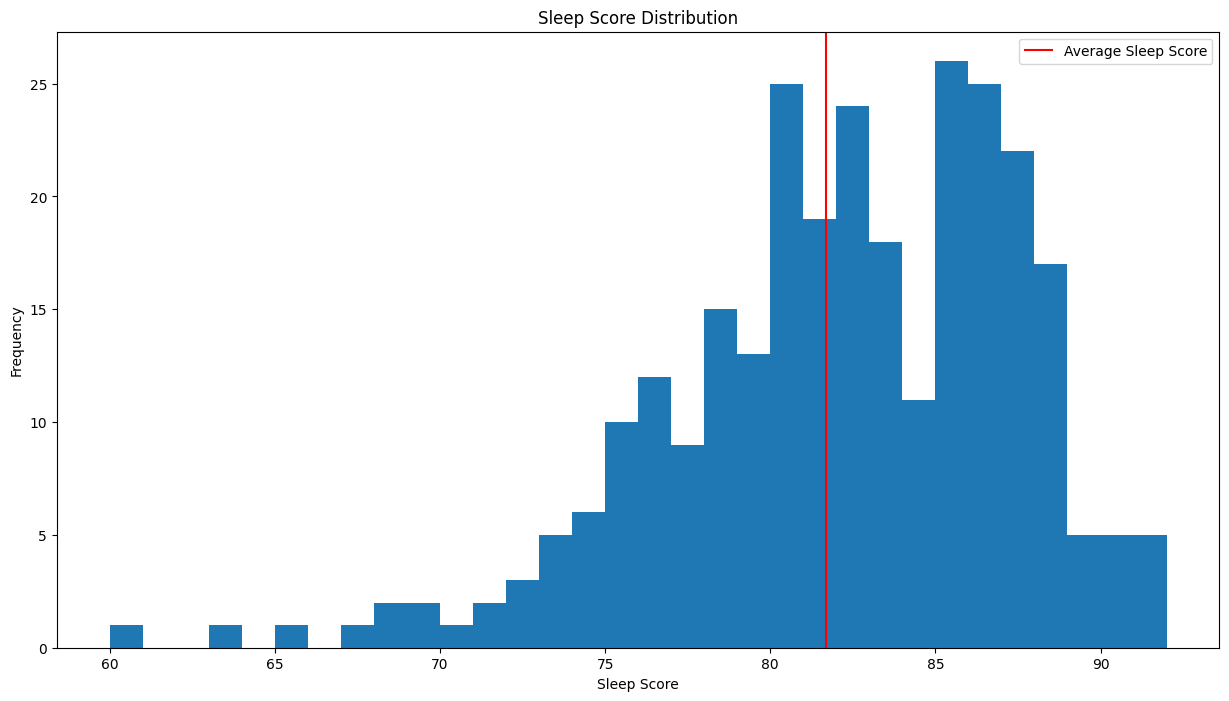

In [199]:
plt.figure(figsize=(15,8))
plt.hist(sleep_data.overall_score, bins=spread)
plt.axvline(sleep_data.overall_score.mean(), color='r', label='Average Sleep Score')
plt.xlabel('Sleep Score')
plt.ylabel('Frequency')
plt.title('Sleep Score Distribution')
plt.legend()

# Splitting the data into training, testing and validation set

In [200]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(sleep_data.iloc[:,:-1], sleep_data['overall_score'], test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

In [201]:
len(X_train), len(X_valid), len(X_test)

(171, 57, 58)

# scaling the features

<Axes: >

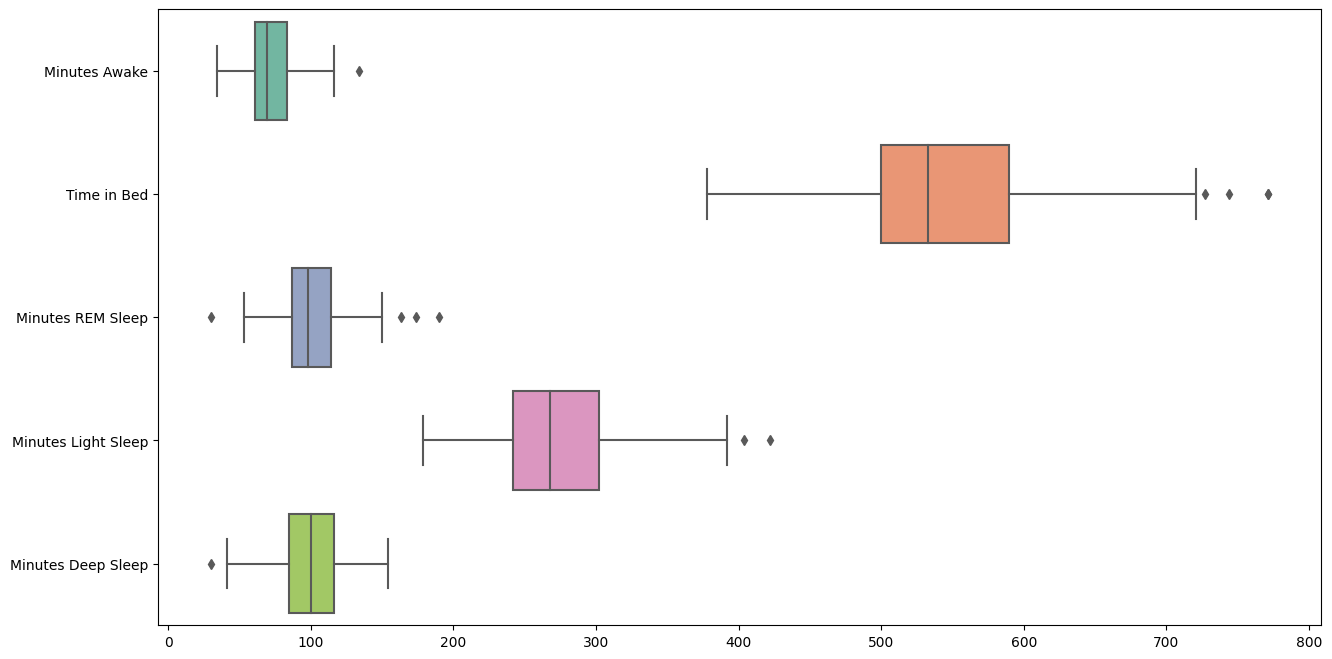

In [202]:
plt.figure(figsize=(15,8))
sns.boxplot(data=X_train.iloc[:,1:], orient='h', palette='Set2')

In [203]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)
scaler.transform(X_test)

array([[ 0.47416413,  0.32      ,  0.45801527,  0.53125   ,  0.44032922,
         0.49193548],
       [ 0.71732523,  0.11      ,  0.60814249,  0.725     ,  0.63374486,
         0.50806452],
       [ 0.23100304,  0.33      ,  0.25699746,  0.38125   ,  0.49382716,
        -0.06451613],
       [ 0.21276596,  0.3       ,  0.23409669,  0.4375    ,  0.21399177,
         0.36290323],
       [ 0.24924012,  0.67      ,  0.35877863,  0.43125   ,  0.10699588,
         0.67741935],
       [ 0.11246201,  0.44      ,  0.18575064, -0.03125   ,  0.34567901,
         0.44354839],
       [ 0.62006079,  0.51      ,  0.62849873,  0.525     ,  0.59670782,
         0.58064516],
       [ 0.70212766,  0.48      ,  0.68956743,  0.55      ,  0.51028807,
         0.93548387],
       [ 0.17021277,  0.17      ,  0.1653944 ,  0.2625    ,  0.12345679,
         0.65322581],
       [ 0.39209726,  0.36      ,  0.39949109,  0.50625   ,  0.35802469,
         0.46774194],
       [ 0.38297872,  0.33      ,  0.38422392,  0.

# Feature selection using Lasso Regression

In [204]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

Text(0.5, 1.0, 'Lasso coefficients for sleep data features')

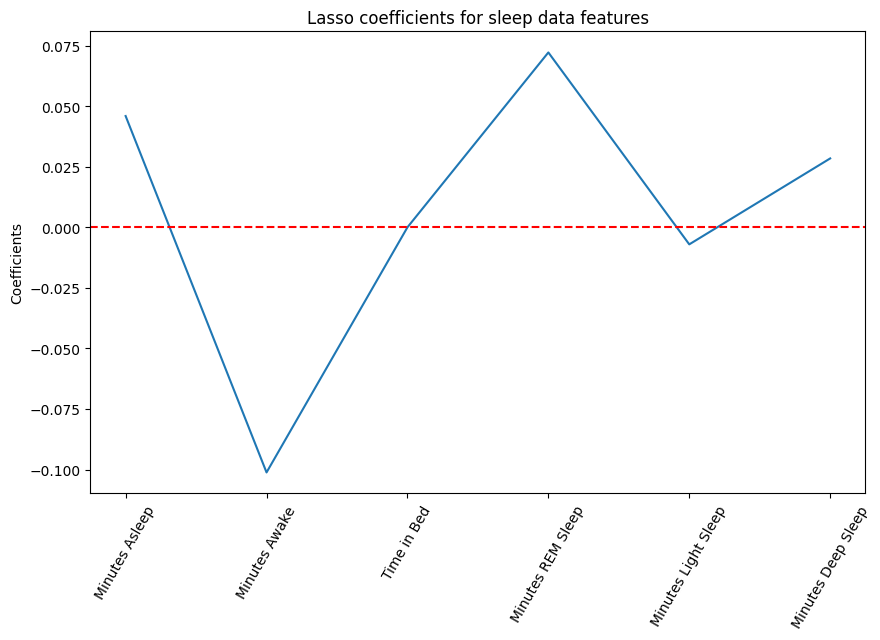

In [205]:
lasso_coef = lasso.coef_

plt.figure(figsize=(10, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients for sleep data features')

In [206]:
cols_to_drop = ['Time in Bed', 'Minutes Light Sleep']

X_train_temp.drop(columns=cols_to_drop, inplace=True)
X_train.drop(columns=cols_to_drop, inplace=True)
X_valid.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

# Defining the performance measure

In [207]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

# Establishing a baseline

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

baseline_y = [y_train.median()] * len(y_valid)

base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape
print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 5.4912.
Mean Squared Error: 47.9474.
R^2 Score = -0.1037.
Accuracy = 92.68%.


# 1) MLR - Multiple Linear Regression

In [209]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
mlr = regressor.fit(X_train, y_train)

In [210]:
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 2.5870.
Mean Squared Error: 10.5967.
R^2 Score = 0.7561.
Accuracy = 96.63%.


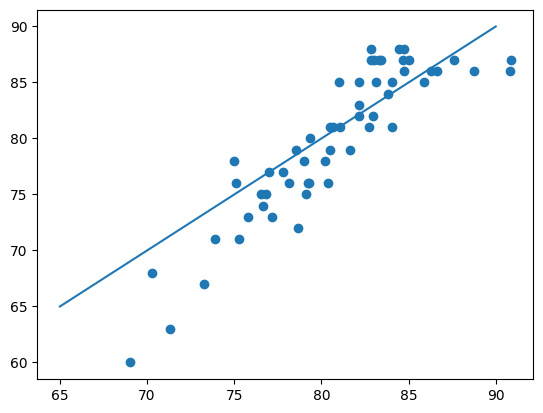

In [211]:
y_pred = mlr.predict(X_valid)

x = np.linspace(65, 90, 25)
y = x

plt.scatter(y_pred, y_valid)
plt.plot(x, y)

# 2) Random Forest Regression

In [212]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf = rf_regressor.fit(X_train, y_train)

In [213]:
scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 2.5875.
Mean Squared Error: 11.3915.
R^2 Score = 0.7378.
Accuracy = 96.58%.


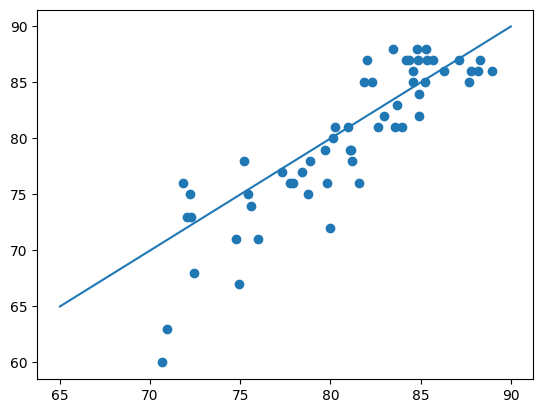

In [214]:
y_pred = rf.predict(X_valid)

x = np.linspace(65, 90, 25)
y = x

plt.scatter(y_pred, y_valid)
plt.plot(x, y)

In [215]:
rf_feats = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
rf_feats

,Feature Importance
Minutes Asleep,0.479255
Minutes Awake,0.111434
Minutes REM Sleep,0.326952
Minutes Deep Sleep,0.082359


# 3) Extreme Gradiend Boosting

In [216]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(random_state=42)
xgb = xgb_regressor.fit(X_train, y_train)

In [217]:
scoring(xgb, X_valid, y_valid)

Model Performance
Mean Absolute Error: 2.9554.
Mean Squared Error: 14.5202.
R^2 Score = 0.6657.
Accuracy = 96.11%.


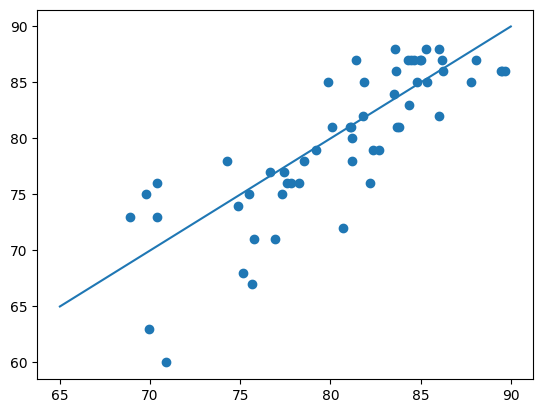

In [218]:
y_pred = xgb.predict(X_valid)

x = np.linspace(65, 90, 25)
y = x

plt.scatter(y_pred, y_valid)
plt.plot(x, y)

In [219]:
xgb_feats = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
xgb_feats

,Feature Importance
Minutes Asleep,0.346840
Minutes Awake,0.147533
Minutes REM Sleep,0.406932
Minutes Deep Sleep,0.098696


# Hyperparameter Optimisation for Random Forest

In [233]:
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]

rf_max_depth.append(None)

rf_max_features = ['auto', 'sqrt', 'log2']

rf_criterion = ['mse']

rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

rf_min_impurity_decrease = [0.0, 0.05, 0.1]

rf_bootstrap = [True, False]

In [234]:
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

rf_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1500, 2000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['mse'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [235]:
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3,verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_temp, y_train_temp)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


ValueError: 
All the 600 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
77 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'squared_error', 'absolute_error', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'friedman_mse', 'absolute_error', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
74 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'poisson', 'friedman_mse', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'squared_error', 'friedman_mse', 'absolute_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'friedman_mse', 'squared_error', 'poisson'}. Got 'mse' instead.

--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'absolute_error', 'poisson'}. Got 'mse' instead.

--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'poisson', 'squared_error'}. Got 'mse' instead.


# Cross-Validation

In [220]:
mlr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = XGBRegressor(random_state=42)

In [221]:
models = [mlr_reg, rf_reg, xgb_reg]

In [222]:
def cv_comparison(models, X, y, cv):
    
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
   
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [223]:
from sklearn.model_selection import cross_val_score
comp, maes, mses, r2s, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

In [224]:
comp.columns = ['Multiple Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']
comp

,Multiple Linear Regression,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,2.2869,2.1735,2.3713
Mean Squared Error,8.3989,7.8714,9.9675
R^2,0.6882,0.7011,0.6190
Accuracy,97.1982,97.3371,97.0948


# Using the test data

In [225]:
mlr_final = LinearRegression()
rf_final = RandomForestRegressor(n_estimators = 200,min_samples_split = 6,min_impurity_decrease = 0.0,max_features = 'sqrt',max_depth = 25,criterion = 'absolute_error',bootstrap = True,random_state = 42)
xgb_final = XGBRegressor(tree_method = 'exact',objective = 'reg:squarederror',n_estimators = 1600,min_child_weight = 6,max_depth = 8,gamma = 0,eta = 0.1,random_state = 42)

In [226]:
mlr_final.fit(X_train_temp, y_train_temp)
rf_final.fit(X_train_temp, y_train_temp)
xgb_final.fit(X_train_temp, y_train_temp)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1600,
             n_jobs=None, num_parallel_tree=None, ...)

In [227]:
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [228]:
final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)
final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']
final_scores

,Linear Regression,Random Forest,Extreme Gradient Boosting
Mean Absolute Error,1.9623,1.9289,2.2042
Mean Squared Error,6.4451,6.0976,9.0791
R^2,0.7888,0.8002,0.7025
Accuracy,97.5790,97.6145,97.2408
